Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("strided_slice:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_1:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_2:0", shape=(2, 2, 128), dtype=float32) Te

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("strided_slice_4:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_5:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_6:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_7:0", shape=(2, 2, 128), dtype=float32)
::::::::::
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("strided_slice_8:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_9:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_10:0", shape=(2, 2, 128), dtype=float32) Tensor("strided_slice_11:0", shape=(2, 2, 128), dtype=float32)
::::::::::
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950


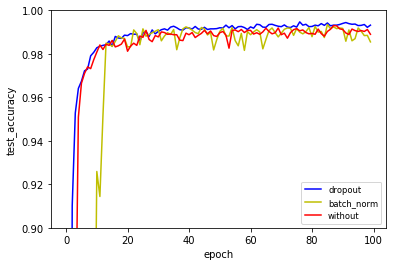

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

#import mnist data in tensorflow
from tensorflow.examples.tutorials.mnist import input_data

# from datetime import datetime
# TIMESTAMP = "{0:%Y-%m-%dT%H-%M-%S/}".format(datetime.now())

mnist = input_data.read_data_sets("MNIST_data/",one_hot = True)

def weight_variable(shape):
  return tf.Variable(tf.truncated_normal(shape,stddev=0.1))

def bias_variable(shape):
  return tf.Variable(tf.constant(0.1,shape=shape))

def conv2d(x,W):
  return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='VALID')

def max_pool_2d(x):
  return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


def compare_models(use_batch_norm,dropout_value):
  test_accuracy_list = []
#   loss_list = []
  #create session
  sess = tf.InteractiveSession()
  
  learning_rate = 0.001
  
  
  #input layer number 28*28
  in_units = 784
  
  #define input x
  x = tf.placeholder(tf.float32,[None,in_units])
  
  #define batch norm variable
  is_training = tf.placeholder(tf.bool,name="is_traning")

  #define dropout probability
  keep_prob = tf.placeholder(tf.float32)
  
  #layer 1
  W_conv1 = weight_variable([3,3,1,32])
  b_conv1 = bias_variable([32])
  
  x_image = tf.reshape(x,[-1,28,28,1])
  
  linear1 = conv2d(x_image,W_conv1) + b_conv1
  
  if use_batch_norm:
    linear1 = tf.layers.batch_normalization(linear1,training=is_training)
  
  hidden_conv1 = tf.nn.relu(linear1)
  hidden_pool1 = max_pool_2d(hidden_conv1)
  
  hidden_pool1 = tf.nn.dropout(hidden_pool1,keep_prob)
  
  
  #layer 2
  W_conv2 = weight_variable([3,3,32,64])
  b_conv2 = bias_variable([64])
  
  linear2 = conv2d(hidden_pool1,W_conv2) + b_conv2
  
  if use_batch_norm:
    linear2 = tf.layers.batch_normalization(linear2,training=is_training)
  
  hidden_conv2 = tf.nn.relu(linear2)
  hidden_pool2 = max_pool_2d(hidden_conv2)
  
  hidden_pool2 = tf.nn.dropout(hidden_pool2,keep_prob)
  
  #layer 3
  W_conv3 = weight_variable([3,3,64,128])
  b_conv3 = bias_variable([128])
  
  linear3 = conv2d(hidden_pool2,W_conv3) + b_conv3
  
  if use_batch_norm:
    linear3 = tf.layers.batch_normalization(linear3,training=is_training)
  
  hidden_conv3 = tf.nn.relu(linear3)
  hidden_pool3 = max_pool_2d(hidden_conv3)
  
  hidden_pool3 = tf.nn.dropout(hidden_pool3,keep_prob)
  
  print(hidden_pool3[0],hidden_pool3[1],hidden_pool3[2],hidden_pool3[3])
  print(":"*10)
  #fully connection
  W_fc = weight_variable([128*2*2,256])
  b_fc = bias_variable([256])
  
  hidden_pool3_flatten = tf.reshape(hidden_pool3,[-1,128*2*2])
  hidden_fc = tf.nn.relu(tf.matmul(hidden_pool3_flatten,W_fc) + b_fc)
  
  #output layer
  W_output = weight_variable([256,10])
  b_output = bias_variable([10])
  y_ = tf.nn.softmax(tf.matmul(hidden_fc,W_output) + b_output)

  

  class_number = 10
  
  #define training label
  y = tf.placeholder(tf.float32,[None,class_number])

  #compress to dimension 1
  loss_function = tf.reduce_mean(tf.reduce_sum((y_ - y) ** 2, reduction_indices=[1]))

  if use_batch_norm:
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
      train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)
  else:
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

  correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

  #activate all defined session part
  tf.global_variables_initializer().run()

  learning_time = 5000

  for time in range(learning_time):
    batch_xs, batch_ys = mnist.train.next_batch(200)
    train_step.run({x:batch_xs,y:batch_ys,keep_prob:dropout_value,is_training:True})
    if time % 100 == 0:
      learning_rate = learning_rate ** 0.9
      #learning rate decay
    if time % 50 == 0:
      print(time)

      test_accuracy = accuracy.eval({x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0,is_training:False})
#       print(test_accuracy)
      test_accuracy_list.append(test_accuracy)
#       loss = loss_function.eval({x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0,is_training:False})
#       print("loss",loss)
#       loss_list.append(loss)
#   return test_accuracy_list,loss_list
  return test_accuracy_list
  

# dropout,dropout_loss = compare_models(use_batch_norm=False,dropout_value=0.5)
# batch_norm,batch_norm_loss = compare_models(use_batch_norm=True,dropout_value=1.0)
# common,common_loss = compare_models(use_batch_norm=False,dropout_value=1.0)
dropout = compare_models(use_batch_norm=False,dropout_value=0.8)
batch_norm = compare_models(use_batch_norm=True,dropout_value=1.0)
common = compare_models(use_batch_norm=False,dropout_value=1.0)
# plt.subplot(1,2,1)
plt.xlabel("epoch")
plt.ylabel("test_accuracy")
plt.ylim((0.9,1))
plt.plot(range(100),dropout,'b-',label="dropout")
plt.plot(range(100),batch_norm,'y-',label="batch_norm")
plt.plot(range(100),common,'r-',label="without")
plt.legend(loc='lower right', fontsize='small')
# plt.subplot(1,2,2)
# plt.xlabel("epoch")
# plt.ylabel("loss")
# plt.ylim((0,0.4))
# plt.plot(range(100),dropout_loss,'b-',label="dropout")
# plt.plot(range(100),batch_norm_loss,'y-',label="batch_norm")
# plt.plot(range(100),common_loss,'r-',label="without")
# plt.legend(loc='upper right', fontsize='small')
plt.show()